In [393]:
# Mount Google Drive into Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1 - Perkenalan

Nama : Bagus Tirta Aji Hakim

Batch : FTDS-018-RMT

Dataset : [Restaurant Reviews](https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews?datasetId=1395030&sortBy=voteCount)

Objective : Mendeteksi teks apakah review customer di restaurant termasuk customer suka dengan makanannya atau tidak dengan yaitu ANN (Artificial Neural Networks)

# 2 - Import Libraries

In [394]:
# nltk.download('stopwords')
# nltk.download('punkt')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [395]:
from nltk.stem import WordNetLemmatizer
# nltk.download("wordnet")
# nltk.download("omw-1.4")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [396]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string # untuk menghilangkan tanda baca
import re # regex
import tensorflow as tf

from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, BatchNormalization, Input, LSTM, GRU, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3 - Data Loading

In [397]:
data = pd.read_csv('/content/gdrive/MyDrive/Hacktiv8/phase2_dataset/Restaurant_Reviews.tsv', sep='\t', header=0)

In [398]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [399]:
data_duplicate = data.copy()

# 4 - EDA before Preprocessing

In [400]:
data.dtypes

Review    object
Liked      int64
dtype: object

In [401]:
print('Dataset terdiri dari', data.shape[0], 'baris dan', data.shape[1], 'kolom.')

Dataset terdiri dari 1000 baris dan 2 kolom.


## 4.1 - Check Missing Values

In [402]:
data.isna().sum() 

Review    0
Liked     0
dtype: int64

Berdasarkan pengecekan tidak ditemukan adanya missing values

## 4.2 - Check the Balance of Target

([<matplotlib.patches.Wedge at 0x7f6ff92dd160>,
 [Text(6.735557395310444e-17, 1.1, 'Not Liked'),
  Text(-2.0206672185931328e-16, -1.1, 'Liked')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

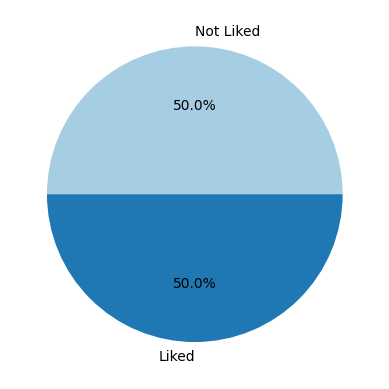

In [403]:
plt.pie(data.Liked.value_counts(), labels = ["Not Liked", "Liked"], colors = sns.color_palette("Paired"), autopct = '%1.1f%%')

Setelah dilakukan pengecekan, dataset yang akan digunanakan sudah balance bahkan dengan angka yang sempurna yaitu untuk Not liked 50% dan Liked 50%

## 4.3 - EDA for Text

In [404]:
text = " ".join(review for review in data['Review'])
print ("Terdapat {} kombinasi kata dari seluruh ulasan.".format(len(text)))

Terdapat 59314 kombinasi kata dari seluruh ulasan.


In [405]:
length = data['Review'].apply(len).max()
print ("Panjang maksimum kata adalah {} dalam gabungan dari seluruh ulasan.".format(length))

Panjang maksimum kata adalah 149 dalam gabungan dari seluruh ulasan.


> Wordcloud before text preprocessing

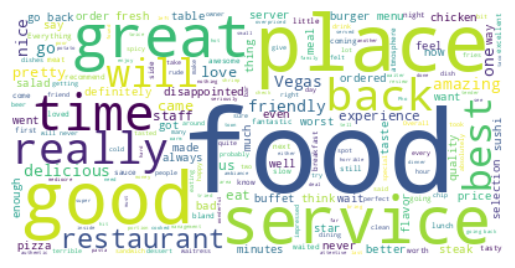

In [406]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Kata yang sering muncul dari keseluruhan kelas sebelum dilakukan preprocessing adalah food, good, place, time, service

In [407]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

> Customer yang reviewnya Positif

In [408]:
data_liked = data[data['Liked'] == 1]
text = " ".join(review for review in data_liked['Review'])

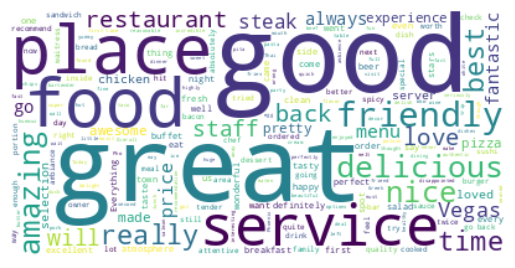

In [409]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Kata yang sering muncul dari kelas positif sebelum dilakukan preprocessing adalah good, great, place, food, service.

* Tidak menutup kemungkinan, customer yang ulasannya positif merupakan customer yang puas dengan layanan yang diberikan baik dari makanan dan tempat

> Customer yang reviewnya Negatif

In [410]:
data_liked = data[data['Liked'] == 0]
text = " ".join(review for review in data_liked['Review'])

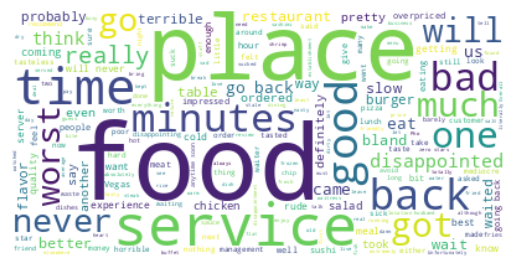

In [411]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Kata yang sering muncul dari kelas negatif sebelum dilakukan preprocessing adalah food, place, minutes.

* Tidak menutup kemungkinan, customer yang ulasannya negatif merupakan customer yang tidak puas dengan layanan yang diberikan baik dari makanan, tempat, dan waktu

# 5 - Text Preprocessing

In [412]:
# View Some Texts
for index,text in enumerate(data['Review'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 The deal included 5 tastings and 2 drinks, and Jeff went above and beyond what we expected.
Review 2:
 - Really, really good rice, all the time.
Review 3:
 The service was meh.
Review 4:
 It took over 30 min to get their milkshake, which was nothing more than chocolate milk.
Review 5:
 I guess I should have known that this place would suck, because it is inside of the Excalibur, but I didn't use my common sense.


## 5.1 - Text Standarization

Langkah awal untuk melakukan preprocessing adalah dengan melakukan text standarisasi yaitu merubah kata yang disingkat menjadi kata aslinya seperti yang kita tahu pada bahasa inggris kata can't merupakan singkatan dari kata can not. 

Hal ini dilakukan dengan tujuan untuk mempermudah dalam melakukan tahap preprocessing selanjutnya seperti menghilangkan stopwords dan ketika dilakukan stemming dan lemmatization.

In [413]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [414]:
def lookup_words(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        if word.lower() in contractions_dict:
            word = contractions_dict[word.lower()]
        new_words.append(word)
    new_text = " ".join(new_words)
    return new_text

In [415]:
data['Review']=data['Review'].apply(lambda x:lookup_words(x))

## 5.2 - Convert Text to Lowercase

Dengan melakukan konversi teks ke lowercase pada maka kita dapat memastikan konsistensi dalam pemrosesan teks karena kata-kata dengan huruf kapital dan huruf kecil dapat dianggap sebagai kata yang berbeda meskipun memiliki arti yang sama.

In [416]:
# Converts Text to Lowercase 
data['lowercase'] = data['Review'].str.lower()

# view some converted text
for index,text in enumerate(data['lowercase'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 the deal included 5 tastings and 2 drinks, and jeff went above and beyond what we expected.
Review 2:
 - really, really good rice, all the time.
Review 3:
 the service was meh.
Review 4:
 it took over 30 min to get their milkshake, which was nothing more than chocolate milk.
Review 5:
 i guess i should have known that this place would suck, because it is inside of the excalibur, but i did not use my common sense.


## 5.3 - Remove Punctuation

Selanjutnya adalah menghilangkan tanda baca dengan tujuan untuk memudahkan pemrosesan karena tanda baca merupakan hal yang tidak penting untuk dianalisis pada NLP. Oleh karena itu, tanda baca yang dihilangkan dapat membantu untuk menghindari kesalahan dalam pemrosesan teks.

In [417]:
# Remove Punctuation
data['re_punc'] = data['lowercase'].str.replace('[{}]'.format(string.punctuation), '')

# view some converted text
for index,text in enumerate(data['re_punc'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 the deal included 5 tastings and 2 drinks and jeff went above and beyond what we expected
Review 2:
  really really good rice all the time
Review 3:
 the service was meh
Review 4:
 it took over 30 min to get their milkshake which was nothing more than chocolate milk
Review 5:
 i guess i should have known that this place would suck because it is inside of the excalibur but i did not use my common sense


## 5.4 - Remove other than Letters

Kemudian langkah selanjutnya adalah menghilangkan angka ataupun emoji jika ada. Sama halnya seperti menghilangkan tanda baca, angka dan emoji bukanlah hal yang penting untuk dianalisa dan tentunya dapat membantu untuk memudahkan pemrosesan data.

In [418]:
# Remove other than letters (number, emoji)
data['re_other'] = data['re_punc'].apply(lambda x: re.sub('\w*\d\w*','', x))

# view some converted text
for index,text in enumerate(data['re_other'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 the deal included  tastings and  drinks and jeff went above and beyond what we expected
Review 2:
  really really good rice all the time
Review 3:
 the service was meh
Review 4:
 it took over  min to get their milkshake which was nothing more than chocolate milk
Review 5:
 i guess i should have known that this place would suck because it is inside of the excalibur but i did not use my common sense


## 5.5 - Remove Duplicate/Overuse Letters

Menghilangkan hufuf duplikat pada NLP (Natural Language Processing) dapat menjadi langkah yang penting dan berguna dalam menganalisis teks. Hal ini karena kata duplikat dapat menyebabkan beberapa masalah dalam analisis teks seperti meningkatnya dimensi data dan dapat menjadi dua kata yang berbeda walapun memiliki arti yang sama

Contoh: 'wayyyyy' dengan 'way'

In [419]:
# define a function to remove duplicate letter continuously repeating character from the word
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) >= 2: # angka dua dipilih agar kata yang memang disusun oleh dua huruf tidak ikut dihilangkan dalam proses ini seperti kata 'too', 'really'
      return tchr[0:2]
     
# define a function to check whether unique character is present or not
def check_unique_char(rep, sent_text):
   
    # regex for repetition of characters
    convert = re.sub(r'(\w)\1+', rep, sent_text)
     
    # returning the converted word
    return convert

In [420]:
# remove duplicate letter
data['re_duplicate_lett'] = data['re_other'].apply(lambda x : check_unique_char(conti_rep_char, x))

# view some converted text
for index,text in enumerate(data['re_duplicate_lett'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 the deal included  tastings and  drinks and jeff went above and beyond what we expected
Review 2:
  really really good rice all the time
Review 3:
 the service was meh
Review 4:
 it took over  min to get their milkshake which was nothing more than chocolate milk
Review 5:
 i guess i should have known that this place would suck because it is inside of the excalibur but i did not use my common sense


## 5.6 - Remove Whitespace

Penghapusan whitespace disini dilakukan untuk menghilangkan spasi yang berlebihan akibat preprocessing yang telah dilakukan sebelumya yaitu ketika menghilangkan angka dan emoji.

In [421]:
# remove whitespace
data['re_whitespc'] = data['re_duplicate_lett'].replace(r'\s+', ' ', regex=True)

# view some converted text
for index,text in enumerate(data['re_whitespc'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 the deal included tastings and drinks and jeff went above and beyond what we expected
Review 2:
  really really good rice all the time
Review 3:
 the service was meh
Review 4:
 it took over min to get their milkshake which was nothing more than chocolate milk
Review 5:
 i guess i should have known that this place would suck because it is inside of the excalibur but i did not use my common sense


## 5.7 - Remove Duplicate Text

Jika sebelumnya adalah menghilangkan huruf yang berlebihan, maka pada preprocessing kali ini adalah menghilangkan kata yang berlebihan. Jika teks memiliki banyak kata duplikat, maka dapat meningkatkan dimensi data yang dapat membuat analisis lebih sulit dan memakan waktu lebih lama. 

Kemudian jika kata duplikat tidak dihapus, hal tersebut dapat mengakibatkan beberapa kata menjadi muncul terlalu sering dan mengurangi akurasi analisis, terutama jika kata-kata tersebut tidak penting atau tidak relevan dalam konteks tertentu.

In [422]:
data['re_duplicate'] = data['re_whitespc'].apply(lambda x: " ".join(sorted(set(x.split()), key=x.split().index)))

# view some converted text
for index,text in enumerate(data['re_duplicate'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 the deal included tastings and drinks jeff went above beyond what we expected
Review 2:
 really good rice all the time
Review 3:
 the service was meh
Review 4:
 it took over min to get their milkshake which was nothing more than chocolate milk
Review 5:
 i guess should have known that this place would suck because it is inside of the excalibur but did not use my common sense


## 5.8 - Remove Stopwords

Menghilangkan stopwords dapat meningkatkan kualitas dan akurasi analisis teks karena stopwords merupakan kata-kata umum yang biasanya tidak memiliki arti khusus dalam konteks tertentu dan sering muncul dalam bahasa sehari-hari. Contoh stopwords dalam bahasa Inggris adalah "the", "and", "a", "an", dan "in". 

Saat stopwords dihilangkan dari teks, hal ini dapat mengurangi jumlah kata dalam teks, mengurangi dimensi data, dan meningkatkan efisiensi dalam pemrosesan teks. Selain itu, menghilangkan stopwords juga dapat membantu menghilangkan informasi yang tidak penting dalam analisis teks.

Peneliti menemukan kata baru pada dataset yang menurutnya tidak memuat informasi yang pentik yaitu 'meh', 'pho', dan 'blah'.

In [423]:
stop_words = list(set(stopwords.words('english')))
new_stop_words = ['meh', 'pho', 'blah', 'would']
stop_words = stop_words + new_stop_words

word_tokens = data['re_duplicate'].apply(lambda x: word_tokenize(x))
data['re_stopwords'] = word_tokens.apply(lambda x: ' '.join([word for word in x if word not in stop_words]))

# view some converted text
for index,text in enumerate(data['re_stopwords'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 deal included tastings drinks jeff went beyond expected
Review 2:
 really good rice time
Review 3:
 service
Review 4:
 took min get milkshake nothing chocolate milk
Review 5:
 guess known place suck inside excalibur use common sense


## 5.9 - Stemming & Lemmatization

### Stem then Lemma

In [426]:
stemmer = PorterStemmer()
stemmed_content = []

for doc in data['re_stopwords']:
  result = [stemmer.stem(word) for word in doc.split()]
  result = ' '.join(result)
  stemmed_content.append(result)

data['stem_n_lemma'] = stemmed_content

# view some converted text
for index,text in enumerate(data['stemmed'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 deal includ tast drink jeff went beyond expect
Review 2:
 realli good rice time
Review 3:
 servic
Review 4:
 took min get milkshak noth chocol milk
Review 5:
 guess known place suck insid excalibur use common sens


In [427]:
wnl = WordNetLemmatizer()
lemmatized_content = []

for doc in data['stem_n_lemma']:
  result = [wnl.lemmatize(word, pos="v") for word in doc.split()]
  result = ' '.join(result)
  lemmatized_content.append(result)

data['stem_n_lemma'] = lemmatized_content

# view some converted text
for index,text in enumerate(data['lemmatized'][70:75]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 deal include taste drink jeff go beyond expect
Review 2:
 really good rice time
Review 3:
 service
Review 4:
 take min get milkshake nothing chocolate milk
Review 5:
 guess know place suck inside excalibur use common sense


# 6 - EDA after Preprocessing

In [428]:
text = " ".join(review for review in data['Review'])
text_1 = " ".join(stem_n_lemma for stem_n_lemma in data['stem_n_lemma'])
print ("Sebelum preprocessing, terdapat {} kombinasi kata dari seluruh ulasan".format(len(text)))
print ("Setelah preprocessing, terdapat {} kombinasi kata dari seluruh ulasan".format(len(text_1)))

Sebelum preprocessing, terdapat 59488 kombinasi kata dari seluruh ulasan
Setelah preprocessing, terdapat 32141 kombinasi kata dari seluruh ulasan


In [429]:
Review = data['stem_n_lemma'].apply(len).max()
length_1 = data['stem_n_lemma'].apply(len).max()
print ("Sebelum preprocessing, panjang maksimum kata adalah {} dalam gabungan dari seluruh ulasan.".format(length))
print ("Setelah preprocessing, panjang maksimum kata adalah {} dalam gabungan dari seluruh ulasan.".format(length_1))

Sebelum preprocessing, panjang maksimum kata adalah 149 dalam gabungan dari seluruh ulasan.
Setelah preprocessing, panjang maksimum kata adalah 98 dalam gabungan dari seluruh ulasan.


> Wordcloud after text preprocessing

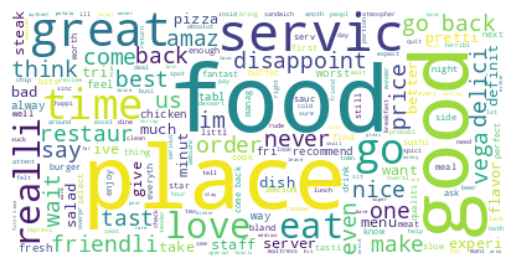

In [430]:
# Generate a word cloud image

wordcloud = WordCloud(background_color="white").generate(text_1)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Kata yang sering muncul dari keseluruhan kelas setelah dilakukan preprocessing ternyata masih sama seperti sebelum dilakukan preprocessing yaitu food, good, place, time, service

> Customer yang reviewnya Positif

In [431]:
data_liked = data[data['Liked'] == 1]
text = " ".join(review for review in data_liked['stem_n_lemma'])

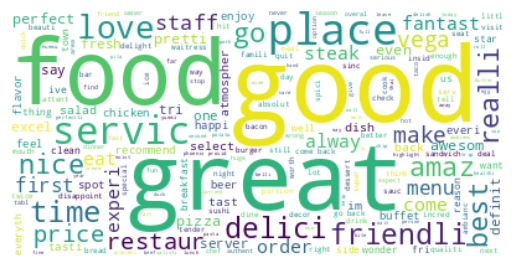

In [432]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Kata yang sering muncul dari kelas positif setelah dilakukan preprocessing adalah good, great, place, food, service.

* Tidak menutup kemungkinan, customer yang ulasannya positif merupakan customer yang puas dengan layanan yang diberikan baik dari makanan dan tempat

> Customer yang reviewnya Negatif

In [433]:
data_liked = data[data['Liked'] == 0]
text = " ".join(review for review in data_liked['stem_n_lemma'])

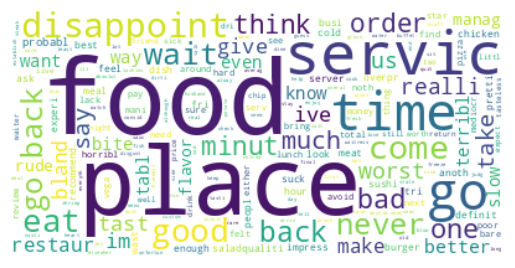

In [434]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Kata yang sering muncul dari kelas negatif setelah dilakukan preprocessing adalah place dan food, service.

* Tidak menutup kemungkinan, customer yang ulasannya negatif merupakan customer yang puas dengan layanan yang diberikan baik dari makanan dan tempat.

# 7 - Feature Engineering

In [435]:
data.head(8)

,Review,Liked,lowercase,re_punc,re_other,re_duplicate_lett,re_whitespc,re_duplicate,re_stopwords,stemmed,lemmatized,stem_n_lemma
0,Wow... Loved this place.,1,wow... loved this place.,wow loved this place,wow loved this place,wow loved this place,wow loved this place,wow loved this place,wow loved place,wow love place,wow love place,wow love place
1,Crust is not good.,0,crust is not good.,crust is not good,crust is not good,crust is not good,crust is not good,crust is not good,crust good,crust good,crust good,crust good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty.,not tasty and the texture was just nasty,not tasty and the texture was just nasty,not tasty and the texture was just nasty,not tasty and the texture was just nasty,not tasty and the texture was just nasty,tasty texture nasty,tasti textur nasti,tasty texture nasty,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,stop late may bank holiday rick steve recommen...,stop late may bank holiday rick steve recommen...,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,the selection on the menu was great and so wer...,the selection on the menu was great and so wer...,the selection on the menu was great and so wer...,the selection on the menu was great and so wer...,the selection on menu was great and so were pr...,selection menu great prices,select menu great price,selection menu great price,select menu great price
5,Now I am getting angry and I want my damn pho.,0,now i am getting angry and i want my damn pho.,now i am getting angry and i want my damn pho,now i am getting angry and i want my damn pho,now i am getting angry and i want my damn pho,now i am getting angry and i want my damn pho,now i am getting angry and want my damn pho,getting angry want damn,get angri want damn,get angry want damn,get angri want damn
6,Honeslty it did not taste THAT fresh.),0,honeslty it did not taste that fresh.),honeslty it did not taste that fresh,honeslty it did not taste that fresh,honeslty it did not taste that fresh,honeslty it did not taste that fresh,honeslty it did not taste that fresh,honeslty taste fresh,honeslti tast fresh,honeslty taste fresh,honeslti tast fresh
7,The potatoes were like rubber and you could te...,0,the potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...,potatoes like rubber could tell made ahead tim...,potato like rubber could tell made ahead time ...,potatoes like rubber could tell make ahead tim...,potato like rubber could tell make ahead time ...


## 7.1 - Split X and y

In [436]:
# Split X and y before splitting train set, test set, and validation set

X = data['stem_n_lemma']
y = data['Liked']

## 7.2 - Split Train set, Test set, and Validation set

In [437]:
# Splitting Corpus / Dataset to train set, test set, and validation set

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=28, stratify = y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=28)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, random_state=0)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (640,)
Val Size :  (160,)
Test Size :  (200,)


## 7.3 - Get Vocab / Unique Token

In [438]:
# Get Vocab / Unique Token

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)
X_val_vec = Vectorize.transform(X_val)

X_train_vec

<640x1182 sparse matrix of type '<class 'numpy.int64'>'
	with 3420 stored elements in Compressed Sparse Row format>

Dari korpus ini, terdapat 786,560 nilai (dari 640 x 1229), namun hanya ada 3,441 token yang memiliki nilai bukan nol (0.4%) dengan 1,229 kosa kata.

In [439]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu DOcument

jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab : ", jml_vocab)
print("Panjang maksimum kalimat : ", max_sen_len, "kata")

Jumlah vocab :  1182
Panjang maksimum kalimat :  15 kata


## 7.4 - Text Encoding

### Text Vectorization

In [440]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # (1,) artinya hanya terdapat satu dimensi pada input (yaitu teks).

text_vectorization.adapt(X_train)

In [441]:
# Melihat Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'place',
 'food',
 'good',
 'servic',
 'great',
 'go',
 'time',
 'like',
 'back',
 'get',
 'realli',
 'come',
 'love',
 'eat',
 'best',
 'ever',
 'one',
 'restaur']

### Word Embedding

In [442]:
# Embedding

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [443]:
# Contoh Hasil Embedding

## Contoh Document
print('Contoh Document')
print(data['stem_n_lemma'][0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([data['stem_n_lemma'][0]]))
print('Ukuran vector : ', text_vectorization([data['stem_n_lemma'][0]]).shape)
print('')

## Hasil Embedding
print('Hasil Embedding')
print(embedding(text_vectorization([data['stem_n_lemma'][0]])))
print('Ukuran vector : ', embedding(text_vectorization([data['stem_n_lemma'][0]])).shape)

Contoh Document
wow love place

Hasil Text Vectorization
tf.Tensor([[316  14   2   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 15), dtype=int64)
Ukuran vector :  (1, 15)

Hasil Embedding
tf.Tensor(
[[[ 4.2183947e-02 -3.8240694e-02  2.7746331e-02 ... -3.4576617e-02
    2.6159827e-02 -4.5971621e-02]
  [-8.7057948e-03  7.9523213e-03 -2.4544179e-02 ...  4.2573895e-02
   -3.4263074e-02 -2.5401223e-02]
  [ 3.9012048e-02  3.2206997e-03  3.5595503e-02 ...  2.3806717e-02
    4.1373942e-02  4.2653751e-02]
  ...
  [-4.5907069e-02  3.7729740e-05 -2.5142385e-02 ...  2.0374242e-02
    2.6701700e-02  3.5955999e-02]
  [-4.5907069e-02  3.7729740e-05 -2.5142385e-02 ...  2.0374242e-02
    2.6701700e-02  3.5955999e-02]
  [-4.5907069e-02  3.7729740e-05 -2.5142385e-02 ...  2.0374242e-02
    2.6701700e-02  3.5955999e-02]]], shape=(1, 15, 128), dtype=float32)
Ukuran vector :  (1, 15, 128)


# 8 - Tensorflow Pipeline

In [444]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(128).shuffle(100).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(128)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(128)

* `batch(128)`: Batch adalah sebuah metode dalam pemrosesan data yang digunakan untuk memproses sejumlah data sekaligus. Dalam hal ini, 128 sampel adalah ukuran batch yang digunakan untuk pelatihan model.

* `shuffle(100)`: Metode ini digunakan untuk mengacak urutan data dalam dataset. Dalam hal ini, urutan data akan diacak dengan urutan acak yang berbeda pada setiap epoch. Nilai 100 menunjukkan ukuran buffer yang digunakan untuk mengambil elemen-elemen acak dari dataset.

* `prefetch(tf.data.AUTOTUNE)`: Metode ini digunakan untuk membantu mempercepat training data

# 9 - Modelling

Metric Evaluasi yang akan digunakan adalah accuracy

* Accuracy dipilih karena data sudah balance dengan baik dan peneliti ingin melihat seberapa baik model dalam memprediksi benar dibandingkan dengan kesuluran data yang diprediksi

Metode evaluasi performansi model adalah dengan menggunakan grafik loss dan val_loss

Grafik loss dan val_loss merupakan visualisasi dari hasil evaluasi performa suatu model machine learning pada setiap epoch atau iterasi training.

* Loss untuk mengukur seberapa besar kesalahan atau perbedaan antara nilai prediksi dan nilai target pada setiap batch data training.
* Val_loss untuk mengukur seberapa besar kesalahan atau perbedaan antara nilai prediksi dan nilai target pada setiap batch data validasi.

## 9.1 - Base Model

In [445]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [446]:
# Model Training dengan Menggunakan LSTM

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

1. Layer pertama adalah menambahkan lapisan text vectorization ke dalam model neural network. Lapisan ini berfungsi untuk mengubah teks menjadi vektor numerik.

2. kemudian layer kedua adalah menambahkan lapisan embedding ke dalam model neural network. Lapisan ini berfungsi untuk megubah suatu angka (yang merupakan hasil dari vectorization) menjadi sekumpulan angka. Tujuannya agar setiap kata dapat dicari kedekatan dengan maknanya.

3. Menambahkan lapisan LSTM (Long Short-Term Memory) sebagai hidden layer pertama ke dalam model neural network dengan 32 unit neuron. return_sequences=True berfungsi karena output sequence dari layer ini akan menjadi input sequence untuk layer LSTM berikutnya

4. Kemudian menambahkan hidden layer kedua sebagai layer terakhir oleh karena return_sequences tidak diaktifkan.

5. Setelah itu terdapat layer dropout untuk mengurangi model mengalami overfitting

6. Menambahkan lapisan Dense ke dalam model neural network dengan 1 unit dan fungsi aktivasi sigmoid. Lapisan ini berfungsi untuk mengeluarkan output berupa probabilitas dari kelas biner (positif atau negatif).

7. Menentukan fungsi loss (binary crossentropy), optimizer (stochastic gradient descent), dan metrik evaluasi (accuracy) untuk model neural network yang telah dibuat. Fungsi loss digunakan untuk mengukur kesalahan prediksi model, optimizer digunakan untuk meminimalkan fungsi loss, dan metrik evaluasi digunakan untuk mengevaluasi performa model selama pelatihan.

In [447]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [448]:
model_lstm_hist_1 = model.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
5/5 [==============================] - 5s 276ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6929 - val_accuracy: 0.5312
Epoch 2/50
5/5 [==============================] - 0s 44ms/step - loss: 0.6933 - accuracy: 0.4938 - val_loss: 0.6929 - val_accuracy: 0.5188
Epoch 3/50
5/5 [==============================] - 0s 47ms/step - loss: 0.6925 - accuracy: 0.5484 - val_loss: 0.6929 - val_accuracy: 0.5250
Epoch 4/50
5/5 [==============================] - 0s 49ms/step - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 0s 49ms/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6931 - val_accuracy: 0.4688
Epoch 6/50
5/5 [==============================] - 0s 54ms/step - loss: 0.6928 - accuracy: 0.5234 - val_loss: 0.6931 - val_accuracy: 0.4812
Epoch 7/50
5/5 [==============================] - 0s 49ms/step - loss: 0.6930 - accuracy: 0.4922 - val_loss: 0.6931 - val_accuracy: 0.5250
Epoch 8/50
5/5 [==========

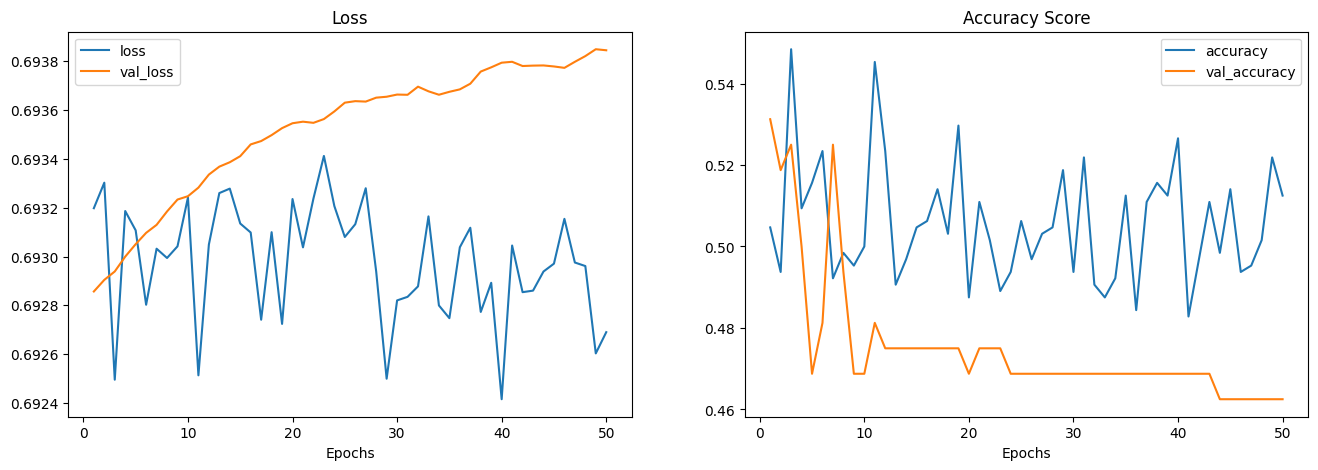

In [449]:
epochs=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),model_lstm_hist_1.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1),model_lstm_hist_1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(range(1,epochs+1),model_lstm_hist_1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1),model_lstm_hist_1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy Score')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

Berdarkan evaluasi performansi model, didapatkan hasil sebagai berikut:

* loss menurun secara tidak stabil tetapi val_loss naik setelah beberapa iterasi, maka ini menunjukkan bahwa model terlalu fokus pada data training dan mengalami overfitting. Kita perlu melakukan tindakan untuk mencegah overfitting dengan melakukan model improvement

* val_loss berfluktuasi atau naik secara bertahap, maka ini menunjukkan bahwa model belum belajar dengan baik atau mungkin terlalu kompleks sehingga sulit untuk menemukan parameter yang optimal. Kita perlu melakukan penyesuaian pada arsitektur model atau hiperparameter.

## 9.2 - Model Improvement

### Menambahkan kernel regularizer

In [450]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [451]:
model_1 = Sequential()
model_1.add(text_vectorization)
model_1.add(embedding)
model_1.add(LSTM(32, return_sequences=True))
model_1.add(LSTM(32))
model_1.add(Dropout(0.2))
model_1.add(Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_1.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

Untuk improvement pertama yang dilakukan adalah masih dengan layer yang sama pada model sebelumnya namun menambahkan kernel regularizers L2 dengan parameter 0.01 pada kernel (atau weight) untuk membantu mengurangi overfitting. 

Regularisasi L2 bertujuan untuk mencegah nilai weight yang besar dan memaksa model untuk fokus pada fitur-fitur yang lebih signifikan. Semakin besar nilai regularisasi, semakin besar pula dampaknya terhadap penalti pada nilai weight.

In [452]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [453]:
model_lstm_hist_2 = model_1.fit(train_pipe, epochs=100, validation_data=val_pipe)

Epoch 1/100
5/5 [==============================] - 6s 346ms/step - loss: 0.7148 - accuracy: 0.4750 - val_loss: 0.7141 - val_accuracy: 0.5125
Epoch 2/100
5/5 [==============================] - 0s 42ms/step - loss: 0.7145 - accuracy: 0.4922 - val_loss: 0.7142 - val_accuracy: 0.5063
Epoch 3/100
5/5 [==============================] - 0s 42ms/step - loss: 0.7145 - accuracy: 0.4719 - val_loss: 0.7141 - val_accuracy: 0.5063
Epoch 4/100
5/5 [==============================] - 0s 46ms/step - loss: 0.7145 - accuracy: 0.4766 - val_loss: 0.7142 - val_accuracy: 0.5188
Epoch 5/100
5/5 [==============================] - 0s 41ms/step - loss: 0.7142 - accuracy: 0.5172 - val_loss: 0.7141 - val_accuracy: 0.5063
Epoch 6/100
5/5 [==============================] - 0s 41ms/step - loss: 0.7141 - accuracy: 0.4953 - val_loss: 0.7141 - val_accuracy: 0.5063
Epoch 7/100
5/5 [==============================] - 0s 44ms/step - loss: 0.7142 - accuracy: 0.5016 - val_loss: 0.7141 - val_accuracy: 0.4875
Epoch 8/100
5/5 [==

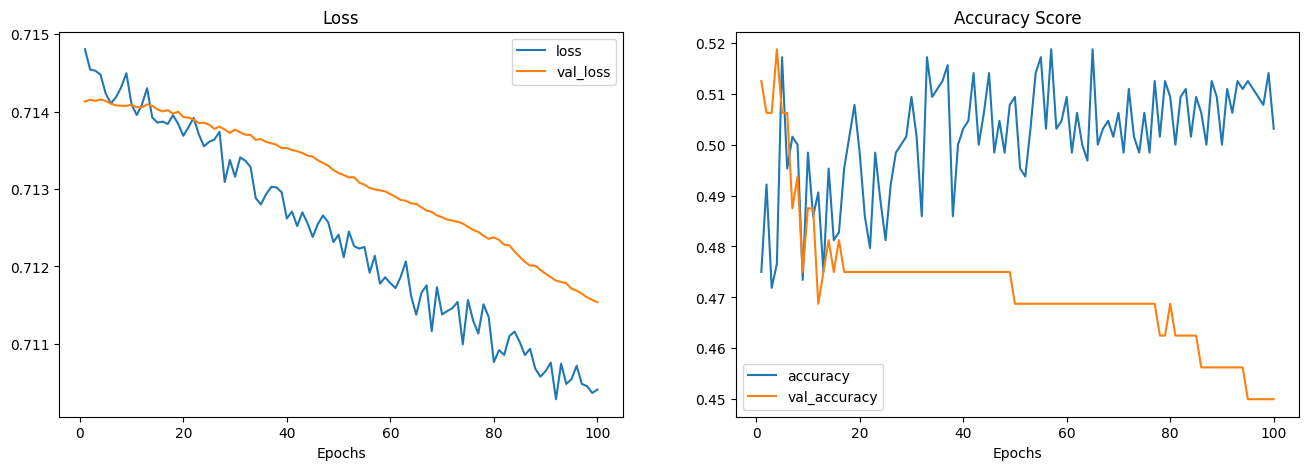

In [454]:
epochs=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),model_lstm_hist_2.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1),model_lstm_hist_2.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(range(1,epochs+1),model_lstm_hist_2.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1),model_lstm_hist_2.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy Score')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

Berdarkan evaluasi performansi model, didapatkan hasil sebagai berikut:

* val_loss menurun secara bertahap dan stabil seiring dengan jumlah iterasi atau epoch, maka ini menunjukkan bahwa model sedang belajar dan performanya semakin baik.

*  loss menurun namun tidak stabil, dapat dilihat masih terdapat banyaknya kasus exploding seiring dengan jumlah iterasi atau epoch, maka ini menunjukkan bahwa model mengalami masalah dengan konvergensi atau overfitting.

### Menambahkan Callback

> **Pendefinisian Callbacks yang akan digunakan untuk fit model yaitu dengan menggunakan ReduceLROnPlataeau dan EarlyStopping**

In [455]:
# early stopping ReduceLROnPlateau
ReduceLROn_Plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=0, verbose=0,
                                       mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

ReduceLROnPlateau digunakan untuk mengurangi learning rate (lr) saat terjadi stagnasi atau pelatihan model tidak mengalami kemajuan. Berikut parameter yang digunakan:

* `monitor='val_loss'` menandakan bahwa monitor untuk pengurangan lr adalah loss pada set validasi.
* `factor=0.1` menunjukkan rasio pengurangan lr, yaitu lr baru akan menjadi 10% dari lr sebelumnya.
* `patience=0` menunjukkan berapa banyak epoch yang harus dilewati sebelum lr berkurang. Jika loss pada set validasi tidak mengalami kemajuan selama 1 epoch, maka lr akan dikurangi.
* `verbose=0` menandakan agar tidak menampilkan pesan secara detail saat terjadi pengurangan lr.
* `mode='auto'` menandakan cara untuk menentukan stagnasi, yaitu jika loss pada set validasi tidak mengalami kemajuan selama 1 epoch maka akan dianggap stagnasi.
* `min_delta=0.0001` menunjukkan perbedaan minimal antara nilai loss yang dianggap mengalami kemajuan dan tidak stagnan.
* `cooldown=0` menunjukkan berapa banyak epoch yang harus dilewati setelah lr dikurangi sebelum pelatihan dilanjutkan.
* min_lr=0 menunjukkan nilai minimum untuk lr yang dapat digunakan. Jika lr yang dihasilkan setelah pengurangan kurang dari min_lr maka min_lr akan digunakan sebagai lr yang baru.

Source: [ReduceLROnPlateau](https://keras.io/api/callbacks/reduce_lr_on_plateau/://)

In [456]:
# early stopping callback
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=0,
                           mode='auto')

EarlyStopping bertujuan untuk menghentikan pelatihan model ketika performa (loss) pada data validasi tidak membaik dalam waktu yang ditentukan oleh patience.

* `monitor='val_loss'` menandakan model akan berhenti ketika performa pada data validasi tidak membaik dari epoch ke epoch berikutnya.
* `patience=0` menunjukkan jumlah epoch yang dapat dilewati sebelum menghentikan pelatihan model setelah tidak ada perbaikan pada loss pada data validasi. Pada kasus ini, pelatihan akan dihentikan langsung ketika terjadi overfitting.
* `mode='auto'` mode yang akan digunakan berfungsi untuk mengukur performa. Mode auto akan memilih mode yang sesuai secara otomatis berdasarkan jenis masalah.

Source: [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)

> **Fitting Model dengan Callback ReduceLROnPlatea**u

In [457]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [458]:
model_2 = Sequential()
model_2.add(text_vectorization)
model_2.add(embedding)
model_2.add(LSTM(32, return_sequences=True))
model_2.add(LSTM(32))
model_2.add(Dropout(0.2))
model_2.add(Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_2.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

Layer-layer yang digunakan masih sama seperti layer yang digunakan pada model sebelumnya, namun untuk proses fit model kali ini akan mencoba menerapkan callbacks ReduceLROnPlateau dengan parameter yang telah didefinisikan sebelumnya.

In [459]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [460]:
model_2_lstm_ReduceLROnPlateau = model_2.fit(train_pipe, epochs=100, validation_data=val_pipe, callbacks = [ReduceLROn_Plateau])

Epoch 1/100
5/5 [==============================] - 5s 276ms/step - loss: 0.7193 - accuracy: 0.4984 - val_loss: 0.7149 - val_accuracy: 0.5437 - lr: 0.0100
Epoch 2/100
5/5 [==============================] - 0s 82ms/step - loss: 0.7190 - accuracy: 0.4984 - val_loss: 0.7150 - val_accuracy: 0.5437 - lr: 0.0100
Epoch 3/100
5/5 [==============================] - 0s 85ms/step - loss: 0.7184 - accuracy: 0.4938 - val_loss: 0.7150 - val_accuracy: 0.5437 - lr: 1.0000e-03
Epoch 4/100
5/5 [==============================] - 0s 85ms/step - loss: 0.7189 - accuracy: 0.4953 - val_loss: 0.7150 - val_accuracy: 0.5437 - lr: 1.0000e-04
Epoch 5/100
5/5 [==============================] - 0s 78ms/step - loss: 0.7182 - accuracy: 0.4938 - val_loss: 0.7150 - val_accuracy: 0.5437 - lr: 1.0000e-05
Epoch 6/100
5/5 [==============================] - 0s 73ms/step - loss: 0.7187 - accuracy: 0.4953 - val_loss: 0.7150 - val_accuracy: 0.5437 - lr: 1.0000e-06
Epoch 7/100
5/5 [==============================] - 0s 84ms/step -

> **Fitting Model dengan Callback EarlyStopping**

In [461]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [462]:
model_3 = Sequential()
model_3.add(text_vectorization)
model_3.add(embedding)
model_3.add(LSTM(32, return_sequences=True))
model_3.add(LSTM(32))
model_3.add(Dropout(0.2))
model_3.add(Dense(1,activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_3.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

Layer-layer yang digunakan masih sama seperti layer yang digunakan pada model sebelumnya, namun untuk proses fit model kali ini akan mencoba menerapkan callbacks EarlyStopping dengan parameter yang telah didefinisikan sebelumnya.

In [463]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                        

In [464]:
model_3_lstm_early_stop = model_3.fit(train_pipe, epochs=100, validation_data=val_pipe, callbacks = [early_stop])

Epoch 1/100
5/5 [==============================] - 5s 284ms/step - loss: 0.7122 - accuracy: 0.4969 - val_loss: 0.7129 - val_accuracy: 0.4625
Epoch 2/100
5/5 [==============================] - 0s 41ms/step - loss: 0.7119 - accuracy: 0.4953 - val_loss: 0.7129 - val_accuracy: 0.4625
Epoch 3/100
5/5 [==============================] - 0s 42ms/step - loss: 0.7122 - accuracy: 0.4875 - val_loss: 0.7128 - val_accuracy: 0.4625
Epoch 4/100
5/5 [==============================] - 0s 41ms/step - loss: 0.7120 - accuracy: 0.5203 - val_loss: 0.7128 - val_accuracy: 0.4625


> **Performa dengan Callback ReduceLROnPlateau**

<Axes: >

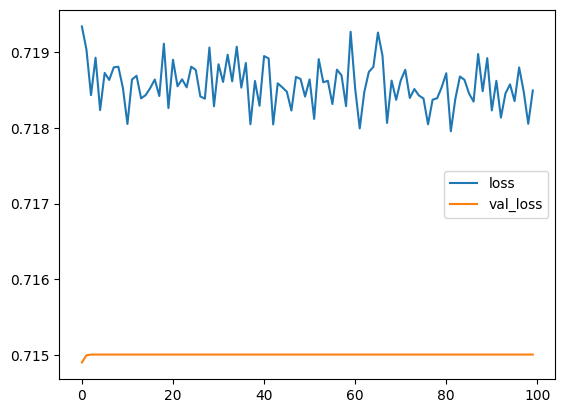

In [465]:
# Melihat Performansi Model pada loss dan val_loss dengan Callback ReduceLROnPlateau

metrics = pd.DataFrame(model_2_lstm_ReduceLROnPlateau.history)
metrics[['loss', 'val_loss']].plot()

<Axes: >

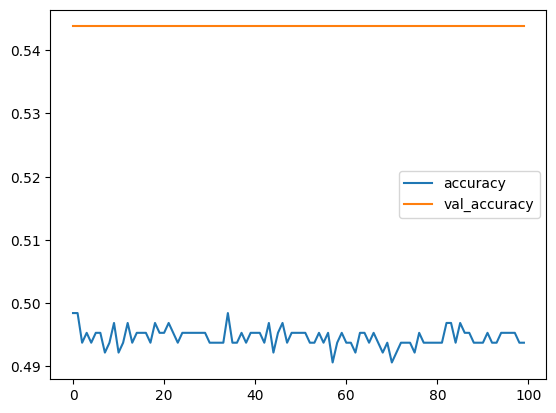

In [466]:
# Melihat Performansi Model pada accuracy dan val_accuracy dengan Callback ReduceLROnPlateau

metrics = pd.DataFrame(model_2_lstm_ReduceLROnPlateau.history)
metrics[['accuracy', 'val_accuracy']].plot()

> **Performa dengan Callback EarlyStopping**

<Axes: >

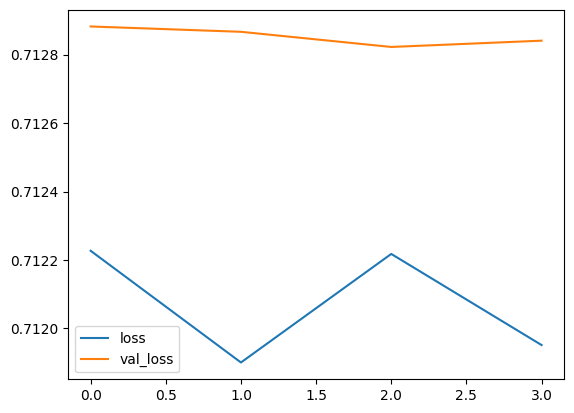

In [467]:
# Melihat Performansi Model pada loss dan val_loss dengan Callback EarlyStopping

metrics = pd.DataFrame(model_3_lstm_early_stop.history)
metrics[['loss', 'val_loss']].plot()

<Axes: >

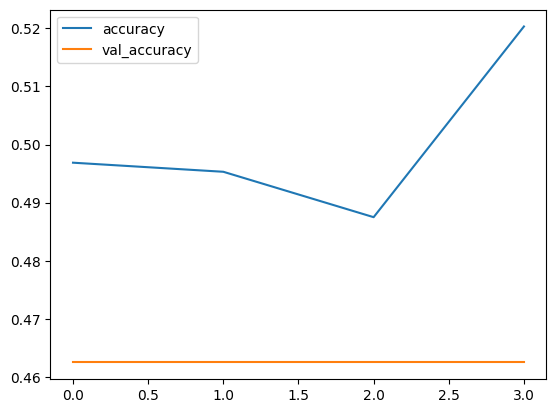

In [468]:
# Melihat Performansi Model pada accuracy dan val_accuracy dengan Callback EarlyStopping

metrics = pd.DataFrame(model_3_lstm_early_stop.history)
metrics[['accuracy', 'val_accuracy']].plot()

### Menambahkan layer LSTM

In [469]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [470]:
model_4 = Sequential()
model_4.add(text_vectorization)
model_4.add(embedding)
model_4.add(LSTM(32, return_sequences=True))
model_4.add(LSTM(32, return_sequences=True))
model_4.add(LSTM(32))
model_4.add(Dropout(0.2))
model_4.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_4.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

Untuk improvement ketiga yang dilakukan adalah menambahkan satu layer LSTM dan layer lainnya masih dengan model imporvement pertama dengan sebelumnya namun menambahkan kernel regularizers-nya namun tanpa callbacks.


In [471]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [472]:
model_lstm_hist_4 = model_4.fit(train_pipe, epochs=100, validation_data=val_pipe)

Epoch 1/100
5/5 [==============================] - 8s 419ms/step - loss: 0.7095 - accuracy: 0.5078 - val_loss: 0.7104 - val_accuracy: 0.4688
Epoch 2/100
5/5 [==============================] - 0s 63ms/step - loss: 0.7095 - accuracy: 0.5094 - val_loss: 0.7104 - val_accuracy: 0.4688
Epoch 3/100
5/5 [==============================] - 0s 62ms/step - loss: 0.7090 - accuracy: 0.5297 - val_loss: 0.7104 - val_accuracy: 0.4688
Epoch 4/100
5/5 [==============================] - 0s 65ms/step - loss: 0.7096 - accuracy: 0.5047 - val_loss: 0.7103 - val_accuracy: 0.4688
Epoch 5/100
5/5 [==============================] - 0s 63ms/step - loss: 0.7092 - accuracy: 0.5000 - val_loss: 0.7103 - val_accuracy: 0.4688
Epoch 6/100
5/5 [==============================] - 0s 64ms/step - loss: 0.7091 - accuracy: 0.5031 - val_loss: 0.7102 - val_accuracy: 0.4688
Epoch 7/100
5/5 [==============================] - 0s 65ms/step - loss: 0.7091 - accuracy: 0.5125 - val_loss: 0.7102 - val_accuracy: 0.4688
Epoch 8/100
5/5 [==

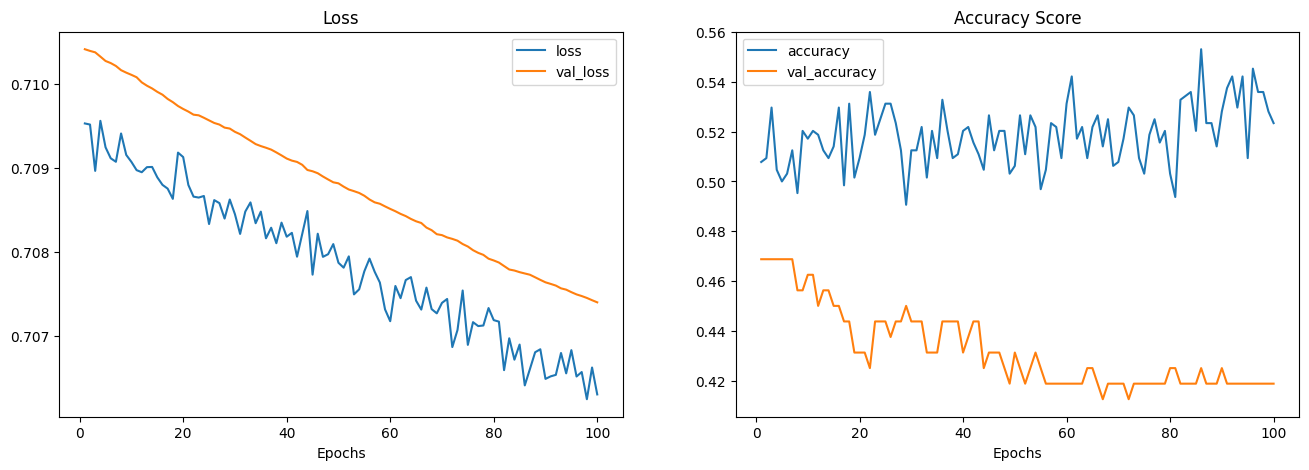

In [473]:
epochs=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),model_lstm_hist_4.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1),model_lstm_hist_4.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(range(1,epochs+1),model_lstm_hist_4.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1),model_lstm_hist_4.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy Score')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

Berdarkan evaluasi performansi model, didapatkan hasil sebagai berikut:

* val_loss menurun secara bertahap dan stabil seiring dengan jumlah iterasi atau epoch, maka ini menunjukkan bahwa model sedang belajar dan performanya semakin baik.

*  loss menurun namun dapat dikatakan cukup stabil dibandingkan dengan model_3, dapat dilihat masih terdapat banyaknya kasus exploding yang minim dibandingkan dengan model_3 seiring dengan jumlah iterasi atau epoch, maka ini menunjukkan bahwa model mulai bisa belajar dan performanya semakin baik.

### Menambahkan jumlah unit neuron pada layer LSTM

In [474]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [475]:
# Model Training dengan Menggunakan LSTM
from tensorflow.keras.layers import BatchNormalization

model_5 = Sequential()
model_5.add(text_vectorization)
model_5.add(embedding)
model_5.add(LSTM(128, return_sequences=True))
model_5.add(LSTM(64, return_sequences=True))
model_5.add(LSTM(32))
model_5.add(Dropout(0.2))
model_5.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model_5.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

Untuk improvement keempat yang dilakukan adalah dengan menggunakan jumlah layer yang sama seperti pada model improvement ketiga, namun pada Layer LSTM pertama dan kedua ditambahkan dengan jumlah neuron yang lebih banyak yaitu sebanyak 128 neuron pada Hidden Layer pertama dan 64 neuron pada Hidden Layer kedua.


In [476]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [477]:
model_lstm_hist_5 = model_5.fit(train_pipe, epochs=100, validation_data=val_pipe)

Epoch 1/100
5/5 [==============================] - 12s 500ms/step - loss: 0.7093 - accuracy: 0.4938 - val_loss: 0.7098 - val_accuracy: 0.4500
Epoch 2/100
5/5 [==============================] - 1s 136ms/step - loss: 0.7092 - accuracy: 0.5063 - val_loss: 0.7098 - val_accuracy: 0.4437
Epoch 3/100
5/5 [==============================] - 1s 138ms/step - loss: 0.7091 - accuracy: 0.5109 - val_loss: 0.7098 - val_accuracy: 0.4500
Epoch 4/100
5/5 [==============================] - 1s 136ms/step - loss: 0.7091 - accuracy: 0.5109 - val_loss: 0.7097 - val_accuracy: 0.4500
Epoch 5/100
5/5 [==============================] - 1s 157ms/step - loss: 0.7090 - accuracy: 0.5047 - val_loss: 0.7097 - val_accuracy: 0.4500
Epoch 6/100
5/5 [==============================] - 1s 204ms/step - loss: 0.7089 - accuracy: 0.5203 - val_loss: 0.7097 - val_accuracy: 0.4563
Epoch 7/100
5/5 [==============================] - 1s 234ms/step - loss: 0.7090 - accuracy: 0.5031 - val_loss: 0.7097 - val_accuracy: 0.4563
Epoch 8/100


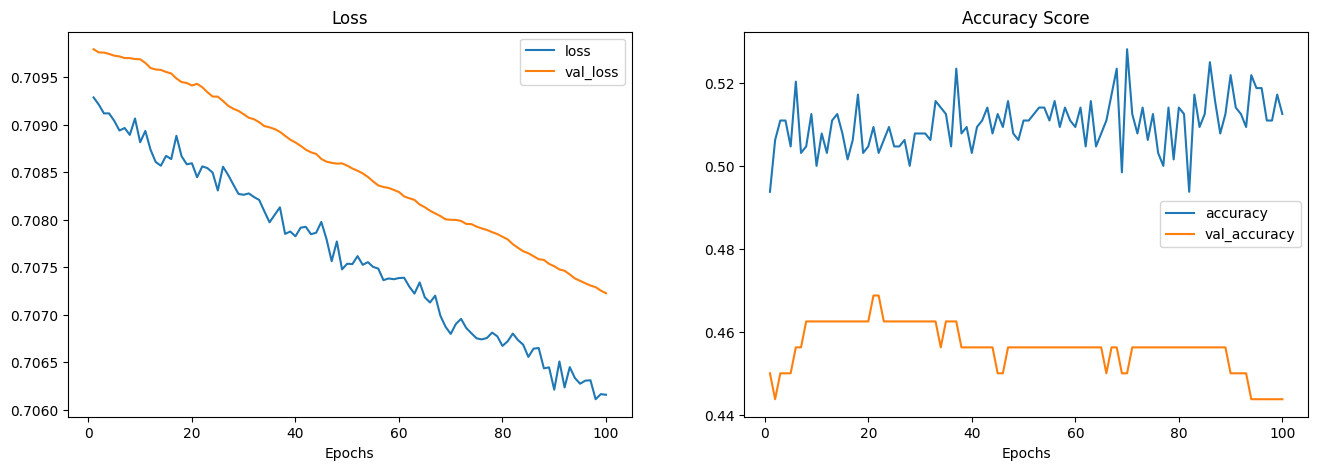

In [478]:
epochs=100

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),model_lstm_hist_5.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1),model_lstm_hist_5.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(range(1,epochs+1),model_lstm_hist_5.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1),model_lstm_hist_5.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy Score')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

Berdarkan evaluasi performansi model, didapatkan hasil sebagai berikut:

* val_loss menurun secara bertahap dan stabil seiring dengan jumlah iterasi atau epoch, maka ini menunjukkan bahwa model sedang belajar dan performanya semakin baik.

*  loss menurun namun tidak stabil, dapat dilihat masih terdapat banyaknya kasus exploding seiring dengan jumlah iterasi atau epoch, maka ini menunjukkan bahwa model mengalami masalah dengan konvergensi atau overfitting.

### Menggunakan layer GRU

In [479]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [480]:
# Model Training dengan Menggunakan GRU

model_6 = Sequential()
model_6.add(text_vectorization)
model_6.add(embedding)
model_6.add(GRU(32, return_sequences=True))
model_6.add(GRU(32))
model_6.add(Dropout(0.2))
model_6.add(Flatten())
model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Improvement model kelima dilakukan dengan mengganti hidden layernya saja yaitu dengan hiddne layer GRU sebanyak 32 unit neuron.

In [481]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 gru (GRU)                   (None, 15, 32)            15552     
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                        

In [482]:
model_gru_hist_1 = model_6.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
5/5 [==============================] - 6s 279ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6930 - val_accuracy: 0.5375
Epoch 2/50
5/5 [==============================] - 0s 48ms/step - loss: 0.6935 - accuracy: 0.4844 - val_loss: 0.6958 - val_accuracy: 0.4563
Epoch 3/50
5/5 [==============================] - 0s 48ms/step - loss: 0.6924 - accuracy: 0.5172 - val_loss: 0.6947 - val_accuracy: 0.4688
Epoch 4/50
5/5 [==============================] - 0s 59ms/step - loss: 0.6930 - accuracy: 0.5172 - val_loss: 0.6939 - val_accuracy: 0.4563
Epoch 5/50
5/5 [==============================] - 0s 54ms/step - loss: 0.6899 - accuracy: 0.5609 - val_loss: 0.6948 - val_accuracy: 0.4563
Epoch 6/50
5/5 [==============================] - 0s 52ms/step - loss: 0.6870 - accuracy: 0.5781 - val_loss: 0.6961 - val_accuracy: 0.4563
Epoch 7/50
5/5 [==============================] - 0s 51ms/step - loss: 0.6820 - accuracy: 0.5875 - val_loss: 0.6954 - val_accuracy: 0.4625
Epoch 8/50
5/5 [==========

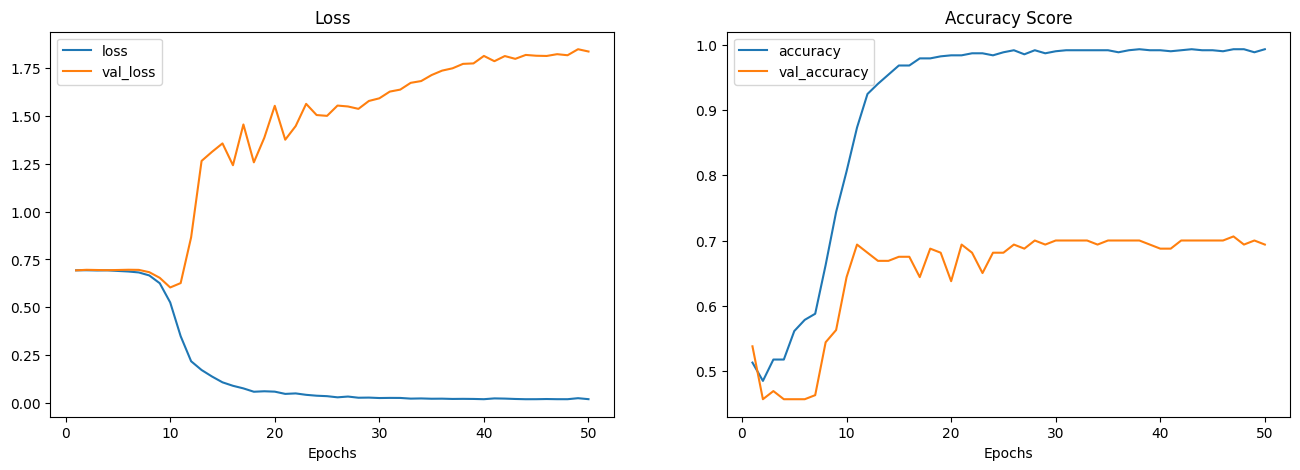

In [483]:
epochs=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epochs+1),model_gru_hist_1.history['loss'],label='loss')
ax[0].plot(range(1,epochs+1),model_gru_hist_1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(range(1,epochs+1),model_gru_hist_1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epochs+1),model_gru_hist_1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy Score')
ax[1].legend()
ax[1].set_xlabel('Epochs')

plt.show()

Berdarkan evaluasi performansi model, didapatkan hasil sebagai berikut:

* loss menurun secara stabil tetapi val_loss naik setelah beberapa iterasi, maka ini menunjukkan bahwa model terlalu fokus pada data training dan mengalami overfitting. Kita perlu melakukan tindakan untuk mencegah overfitting dengan melakukan model improvement

* val_loss berfluktuasi atau naik secara bertahap, maka ini menunjukkan bahwa model belum belajar dengan baik atau mungkin terlalu kompleks sehingga sulit untuk menemukan parameter yang optimal

# 10 - Model Evaluation

Berdasarkan modellin serta dilakukan improvement model, maka peneliti memilih model_4 berdasarkan grafik loss dan val_loss yang memiliki selisih lebih kecil dibandingkan dengan model_5.

Berikut adalah classfication report dan confusion matrix untuk model_4

In [492]:
y_pred_seq_train = model_4.predict(X_train)
y_pred_seq_test = model_4.predict(X_test)

y_pred_seq_train = np.where(y_pred_seq_train >= 0.5, 1, 0)
y_pred_seq_test = np.where(y_pred_seq_test >= 0.5, 1, 0)

print('accuracy score train set: %.3f' % accuracy_score(y_train, y_pred_seq_train))
print('accuracy score test set: %.3f \n' % accuracy_score(y_test, y_pred_seq_test))
print('Classfication Report pada Train set: \n', classification_report(y_train, y_pred_seq_train), '\n')
print('Classfication Report pada Test set: \n', classification_report(y_test, y_pred_seq_test))

7/7 [==============================] - 0s 12ms/step
accuracy score train set: 0.591
accuracy score test set: 0.510 

Classfication Report pada Train set: 
               precision    recall  f1-score   support

           0       0.92      0.19      0.32       318
           1       0.55      0.98      0.71       322

    accuracy                           0.59       640
   macro avg       0.74      0.59      0.51       640
weighted avg       0.74      0.59      0.51       640
 

Classfication Report pada Test set: 
               precision    recall  f1-score   support

           0       0.47      0.07      0.12        97
           1       0.51      0.92      0.66       103

    accuracy                           0.51       200
   macro avg       0.49      0.50      0.39       200
weighted avg       0.49      0.51      0.40       200



1. Berdasarkan laporan klasifikasi yang diberikan, model yang dibangun menghasilkan akurasi sebesar 59% pada train set dan 51% pada test set. Hal ini menunjukkan bahwa model tersebut masih membutuhkan peningkatan performa.

2. Dalam analisis lebih lanjut, recall untuk kelas 0 pada kedua set data sangat rendah, yaitu 0,19 pada train set dan 0,07 pada test. Ini menunjukkan bahwa model kurang efektif dalam mengenali kelas 0, dan mungkin perlu dilakukan penyesuaian pada proses pelatihan untuk meningkatkan performa model pada kelas yang lebih sedikit dikenali.

3. Di sisi lain, recall untuk kelas 1 pada kedua set data relatif tinggi, yaitu 0,98 pada train set dan 0,92 pada test. Ini menunjukkan bahwa model cukup efektif dalam mengenali kelas 1.

4. Dalam hal precision, model memiliki nilai yang relatif baik untuk kedua kelas pada kedua set data, meskipun precision untuk kelas 0 masih lebih rendah dibandingkan dengan precision untuk kelas 1.

5. Dalam keseluruhan, model tersebut masih memerlukan perbaikan dalam mengenali kelas yang lebih jarang terjadi (kelas 0) dan meningkatkan akurasi secara keseluruhan.

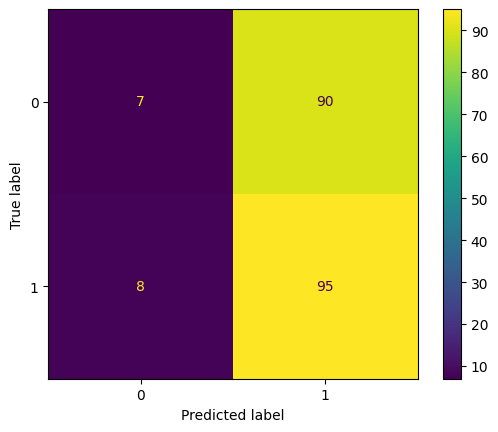

In [485]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_seq_test)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Dari hasil confusion matrix tersebut, kita dapat melihat nilai true positive (TP), false positive (FP), false negative (FN), dan true negative (TN) dari model klasifikasi. Berikut adalah interpretasi dari confusion matrix tersebut:

* True Positive (TP): Jumlah data yang sebenarnya positif dan diprediksi benar oleh model.
* False Positive (FP): Jumlah data yang sebenarnya negatif, tetapi diprediksi positif oleh model.
* False Negative (FN): Jumlah data yang sebenarnya positif, tetapi diprediksi negatif oleh model.
* True Negative (TN): Jumlah data yang sebenarnya negatif dan diprediksi benar oleh model.

Berdasarkan confusion matrix yang dihasilkan, kita dapat melihat bahwa model telah berhasil memprediksi 95 data positif dengan benar (TP) dan 7 data negatif dengan benar (TN). Namun, terdapat 8 data yang sebenarnya positif tetapi diprediksi negatif oleh model (FN) dan 90 data yang sebenarnya negatif tetapi diprediksi positif oleh model (FP).

Dari kesimpulan tersebut, dapat disimpulkan bahwa model klasifikasi masih memiliki kekurangan dalam mengidentifikasi data negatif dengan baik. Oleh karena itu, model tersebut perlu ditingkatkan performanya agar dapat lebih baik dalam mengidentifikasi data negatif.

# 11 - Model Saving

> Freeze the Model

In [486]:
# Summary of the choosen model 

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [487]:
# Freeze Model

model_4.trainable = False
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           151296    
                                                                 
 lstm (LSTM)                 (None, 15, 32)            20608     
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

> Save the Model

In [493]:
# Save ANN Model
model_4.save('customer_review_model', save_format='tf')

In [495]:
import zipfile
import os

# Define the name of the zip file
zip_filename = 'customer_review_model.zip'

# Create a zip file object
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zip_obj:
    # Add all the files in the directory to the zip file
    for root, dirs, files in os.walk('customer_review_model'):
        for file in files:
            zip_obj.write(os.path.join(root, file))

# 12 - Overall Conclusion

> **Based on EDA**

* Dataset terdiri dari 1000 baris 12 kolom,tidak ditemukan adanya missing values, dan dataset yang  digunanakan sudah balance dengan sempurna.
* Sebelum preprocessing, terdapat 59488 kombinasi kata dari seluruh ulasan dan setelah preprocessing menjadi 32141 kombinasi kata dari seluruh ulasan.
* Sebelum preprocessing, panjang maksimum kata adalah 149 dalam gabungan dari seluruh ulasan dan setelah preprocessing panjang maksimum kata menjadi 98 dalam gabungan dari seluruh ulasan.

> **Based on Model Evalution**

* Model klasifikasi masih memiliki kekurangan dalam mengidentifikasi data negatif dengan baik. Oleh karena itu, model tersebut perlu ditingkatkan performanya agar dapat lebih baik dalam mengidentifikasi data negatif.

> **Futher Improvement**

* Melakukan augmentasi data untuk menambah variansi data agar tidak menimbulkan overfitting pada model.
* Menggunakan regularisasi laiinya seperti dropout atau penalti L1/L2 untuk mengurangi overfitting.
* Menambahkan normalisasi batch atau normalisasi layer untuk memastikan nilai bobot tetap stabil selama pelatihan.